In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.text import *
import os
import json
from tqdm import tqdm
import pandas as pd

torch.cuda.set_device(0)

## Constants

In [2]:
lang = 'fr'

In [3]:
path = Path("/home/momgpu/Documents/NLP/course/data/TVA")

In [4]:
mdl_path = Path("/home/momgpu/.fastai/data/TVA")

In [5]:
path

PosixPath('/home/momgpu/Documents/NLP/course/data/TVA')

In [7]:
out_list = []
for i in os.listdir(path):
    with open(path/i, "r") as fich:
        content = json.load(fich)
    for j in content:
        if not j["text_body"] == "":
            out_list.append(j["text_body"])

In [10]:
out_list[:500]

["Les meurtres ont été commis mercredi soir dans la petite localité de 500 habitants située à l'ouest de Saint-Jovite. Le présumé meurtrier, âgé de 17 ans, deviendra majeur la semaine prochaine. Un juge pourrait décider, à la demande de la Couronne, qu'il soit jugé comme adulte. Le suspect se trouvait encore dans la maison quand les policiers sont arrivés. Le corps du père a été retrouvé dans l'atelier et celui de la mère, dans le sous-sol. Le suspect n'habitait plus avec chez ses parents, selon des témoignages recueillis sur place, et il aurait eu des problèmes de consommation de drogue. Dans une entrevue à TVA, son colocataire et ami affirme que ces assassinats ont été longuement muris et que l'accusé nourrissait depuis longtemps de la rage contre ses parents. Pour en savoir plus vous pouvez visionner le reportage de Jean-François Guérin en RealVideo. Pour ce faire, cliquez sur l'icône rouge firgurant au bas de la photo.",
 "Le président de Surentec a confirmé au Journal de Montréal 

In [18]:
df = pd.DataFrame(out_list)

In [22]:
df

,0
0,Les meurtres ont été commis mercredi soir dans...
1,Le président de Surentec a confirmé au Journal...
2,Tous ces gestes auraient été posés à La Tuque....
3,C'est ce que révèle le quotidien La Presse d'a...
4,L'enfant est décédé cette semaine des suites d...
5,Le travailleur s'affairait à poser un grillage...
6,Les manifestants demandent que la piste de mot...
7,Un total de 117 des 175 employés ont assisté à...
8,Ce projet coûterait autour de 110 millions de ...
9,Dans les zones d'exclusivité sur des portions ...


In [20]:
df_2 = df.sample(frac=1).reset_index(drop=True)

In [26]:
df_2

,0
0,Une jeune femme qui vivait de remords a décidé...
1,"L'appareil, un Antonov-26, a pris feu mardi so..."
2,Plusieurs participants avaient quitté la salle...
3,C'est qu'ils auront la chance de fréquenter un...
4,"Le sergent-chef de la GRC, Hugh Stewart, s'éta..."
5,"Réunis en assemblée, les travailleurs ont exig..."
6,Huit activistes de Greenpeace ont abordé le ca...
7,Le billet acheté à la Tabagie 500 au centre-vi...
8,Après le scandale Salé-Pelletier survenu lors ...
9,Ce n'est que le 27 décembre que la juge Michel...


In [23]:
df_2.to_csv(mdl_path/"TVA99k.csv", index=None)

In [24]:
df_3 = pd.read_csv(mdl_path/"TVA99k.csv")

In [25]:
df_3

,0
0,Une jeune femme qui vivait de remords a décidé...
1,"L'appareil, un Antonov-26, a pris feu mardi so..."
2,Plusieurs participants avaient quitté la salle...
3,C'est qu'ils auront la chance de fréquenter un...
4,"Le sergent-chef de la GRC, Hugh Stewart, s'éta..."
5,"Réunis en assemblée, les travailleurs ont exig..."
6,Huit activistes de Greenpeace ont abordé le ca...
7,Le billet acheté à la Tabagie 500 au centre-vi...
8,Après le scandale Salé-Pelletier survenu lors ...
9,Ce n'est que le 27 décembre que la juge Michel...


In [30]:
split_ratio = 0.1
tot_len = len(df_3)
split_index = int(tot_len *(1-split_ratio))

In [31]:
split_index

89235

In [32]:
df_train = df_3.iloc[:split_index, :]
df_valid = df_3.iloc[split_index:len(df_3), :]

In [33]:
df_train['is_valid'] = False
df_valid['is_valid'] = True

/home/momgpu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/momgpu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
df_train, df_valid

(                                                       0  is_valid
 0      Une jeune femme qui vivait de remords a décidé...     False
 1      L'appareil, un Antonov-26, a pris feu mardi so...     False
 2      Plusieurs participants avaient quitté la salle...     False
 3      C'est qu'ils auront la chance de fréquenter un...     False
 4      Le sergent-chef de la GRC, Hugh Stewart, s'éta...     False
 ...                                                  ...       ...
 89230  Rampal est l'un de ceux qui a le plus enregist...     False
 89231  La société de médias a rapporté un bénéfice ne...     False
 89232  Les responsables de l'américain Chevron, du br...     False
 89233  Le vice-président aux communications et aux re...     False
 89234  Le prix de l'once d'or pour livraison de décem...     False
 
 [89235 rows x 2 columns],
                                                        0  is_valid
 89235  Le bénéfice s’était alors élevé à 218M$ ou 0,5...      True
 89236  Les Montréa

In [35]:
df_regroup = pd.concat([df_train, df_valid])

In [36]:
df_regroup

,0,is_valid
0,Une jeune femme qui vivait de remords a décidé...,False
1,"L'appareil, un Antonov-26, a pris feu mardi so...",False
2,Plusieurs participants avaient quitté la salle...,False
3,C'est qu'ils auront la chance de fréquenter un...,False
4,"Le sergent-chef de la GRC, Hugh Stewart, s'éta...",False
5,"Réunis en assemblée, les travailleurs ont exig...",False
6,Huit activistes de Greenpeace ont abordé le ca...,False
7,Le billet acheté à la Tabagie 500 au centre-vi...,False
8,Après le scandale Salé-Pelletier survenu lors ...,False
9,Ce n'est que le 27 décembre que la juge Michel...,False


In [37]:
df_regroup.to_csv(mdl_path/'splitTVA99k.csv', header=None, index=None)

In [7]:
bs = 104

In [28]:
tokenizer = Tokenizer(lang='fr', n_cpus=24)

In [38]:
data_lm_full = TextList.from_csv(mdl_path,csv_name='splitTVA99k.csv', cols=0, processor=[TokenizeProcessor(tokenizer=tokenizer), NumericalizeProcessor(max_vocab=60000)])

In [39]:
data_lm_full = data_lm_full.split_from_df(col=1)

In [40]:
data_lm_full = data_lm_full.label_for_lm()

In [41]:
data_lm_full = data_lm_full.databunch(bs=bs, num_workers=24)

In [42]:
data_lm_full.show_batch()

idx,text
0,"et devait regagner la capitale angolaise dans la soirée , selon xxmaj lusa . xxbos xxmaj plusieurs participants avaient quitté la salle avant le vote , convaincus que les offres seraient rejetées . xxmaj les procureurs obtiennent donc une augmentation de 9 % sur quatre ans , la même que celle accordée aux autres employés de l' xxmaj état . xxup c' est loin du rattrapage de 30 % qu'"
1,"en xxmaj allemagne , en xxmaj italie . xxmaj et depuis peu , au xxmaj canada . xxup j' aurais pu envoyer les patients ailleurs au xxmaj canada . xxup d' ailleurs , les hôpitaux d' xxmaj ottawa , de xxmaj toronto , de xxmaj vancouver m' ont xxunk . xxup j' ai choisi xxmaj québec , parce c' est un atout pour la région » . xxup c' est"
2,"qui ont mené l' assaut pour reprendre xxmaj elian , car « nous avions des informations selon lesquelles il pouvait y avoir des armes dans la maison ou parmi la foule » . xxmaj auparavant , la ministre de la xxmaj justice , xxmaj janet xxmaj reno , avait affirmé n' avoir « aucun regret » . « xxup j' ai tenté de mon mieux à mon niveau de faire"
3,"commencent maintenant à regarder ailleurs . xxup l' aide du public est toujours appréciée , mais les policiers demandent maintenant aux citoyens de donner des noms de suspects et non seulement des signalements , et de considérer que l' agresseur pourrait ne plus avoir de barbe . xxmaj entre-temps , dans le secteur ou l' agression s' est produite , on a bien hâte que le suspect soit appréhendé ."
4,"deux . xxbos xxmaj la division xxmaj santé et nutrition d’ xxmaj atrium xxmaj innovations ( anciennement xxmaj atrium xxmaj biotechnologies ) fait son entrée en xxmaj europe . xxmaj et par la grande porte ! xxmaj mucos , basée à xxmaj munich , commercialise des produits à base d' enzymes depuis plus de 50 ans . xxmaj son produit vedette , xxmaj xxunk , est l’ anti - inflammatoire"


In [48]:
data_lm_full.save("TVA99klm")

In [49]:
data = load_data(mdl_path, "TVA99klm", bs=bs)

In [61]:
weights_pretrained = '/home/momgpu/.fastai/data/frwiki/models/1st50k_with_60kvocab'
itos_pretrained = '/home/momgpu/.fastai/data/frwiki/models/itos_60kvocab'
pretrained_data = (weights_pretrained, itos_pretrained)

In [62]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.5, callback_fns=ShowGraph, pretrained_fnames=pretrained_data)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


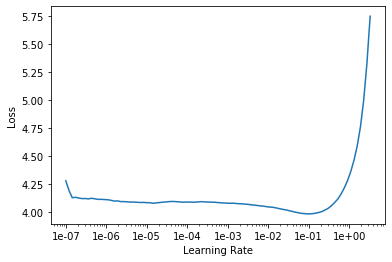

In [63]:
learn.lr_find()
learn.recorder.plot(skip_start=0)

epoch,train_loss,valid_loss,accuracy,time
0,3.478063,3.457534,0.343686,11:17
1,3.192646,3.186545,0.366165,11:22
2,3.055812,3.092360,0.373928,11:23
3,2.970310,3.054298,0.378174,11:23
4,2.889048,3.036216,0.380343,11:22
5,2.857588,3.027776,0.381829,11:23
6,2.776845,3.022893,0.382835,11:23
7,2.747462,3.022253,0.383218,11:23
8,2.709699,3.023239,0.383458,11:23
9,2.689620,3.023796,0.383303,11:23


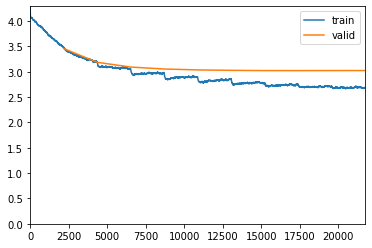

In [64]:
learn.fit_one_cycle(10, 2e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.707005,2.953658,0.392987,12:39
1,2.734123,2.894346,0.402337,12:39
2,2.571529,2.845291,0.411638,12:38
3,2.306706,2.839804,0.417005,12:38
4,2.075782,2.883260,0.414988,12:38


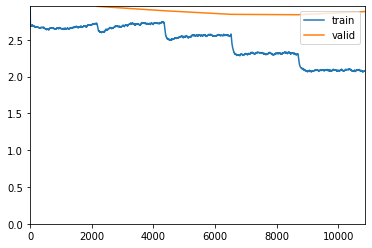

In [65]:
learn.unfreeze()
learn.fit_one_cycle(5, 2e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.050941,2.901577,0.413872,12:38


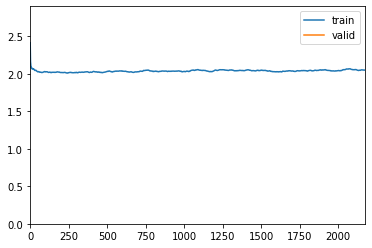

In [66]:
learn.fit_one_cycle(1, 2e-4, moms=(0.8,0.7))

In [67]:
learn.save(mdl_path/'1stTVA_pretrained')

In [68]:
learn.data.vocab.save(mdl_path/'1stTVA_pretrained')

In [69]:
learn.export(mdl_path/"1stTVA_pretrained.pkl")

In [24]:
learn = load_learner(mdl_path, "1stTVA_pretrained.pkl")

In [26]:

learn.predict("L’heure était au nettoyage mercredi matin à Lac-aux-Sables, en Mauricie, après le passage d’une possible tornade qui a causé plusieurs dégâts dans le secteur, sans faire de blessés graves.",200, temperature=0.3)


"L’heure était au nettoyage mercredi matin à Lac-aux-Sables, en Mauricie, après le passage d’une possible tornade qui a causé plusieurs dégâts dans le secteur, sans faire de blessés graves. Les autorités ont dû évacuer des résidants , des milliers de résidants et des résidants de la réserve amérindienne de Wemotaci . Les autorités ont dû évacuer leurs résidences , leurs résidences et les résidences des habitants et de la Sûreté du Québec . Le Ministère a mis sur pied un plan de prévention des incendies , qui prévoit des mesures de prévention et de prévention . Les autorités ont aussi fait savoir que la sécurité des gens était menacée . En vidéo , voyez le reportage de Kathleen Frenette . xxbos Le Canadien Mike Weir a pris la deuxième place , à un coup des meneurs de l' Omnium canadien Canadien . Il a terminé au deuxième rang , à égalité avec l' Ontarien Mike Weir , qui a joué 68 . Weir a joué 69 , soit deux sous la normale , pour se retrouver à égalité au troisième rang avec un coup de

In [101]:
text

"Denis Shapovalov a été le plus grand joueur de ce tournoi . xxbos Les flammes ont pris naissance vers 4 h dans un immeuble situé au coin des rues Sherbrooke et Clark . Les pompiers ont réussi à sauver la maison en flammes . Le feu s' The Victoria ' , un livre de la famille Molson , a été découvert par des pompiers dans une école de la ville . Les pompiers ont dû utiliser les outils de cuisine pour s' Hôtel Match ' . La cause de l' incendie est inconnue pour l' hôpital , mais la maison n' Sync a été détruite . Les pompiers ont dû utiliser les outils pour faire des rénovations . Les pompiers ont mis plus de deux heures à maîtriser le brasier . Vous pouvez écouter le reportage de Maxime Landry en realvideo . xxbos Les Canadiens de Montréal ont annoncé la semaine dernière qu' ils avaient été mis en lock-out le 14 juillet dernier . xxbos Les Canadiens de Montréal ont annoncé"

In [8]:
data = load_data(mdl_path, "TVA99klm", bs=bs)

In [9]:
weights_pretrained = '/home/momgpu/.fastai/data/frwiki/models/1st50k_with_60kvocab'
itos_pretrained = '/home/momgpu/.fastai/data/frwiki/models/itos_60kvocab'
pretrained_data = (weights_pretrained, itos_pretrained)

In [10]:
learn2 = language_model_learner(data, AWD_LSTM, drop_mult=0.5, callback_fns=ShowGraph, pretrained_fnames=pretrained_data)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


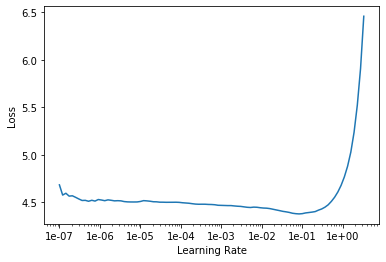

In [11]:
learn2.lr_find()
learn2.recorder.plot(skip_start=0)

epoch,train_loss,valid_loss,accuracy,time
0,3.890182,3.528670,0.335810,11:30
1,3.559663,3.258742,0.357434,11:30
2,3.439939,3.162918,0.365542,11:31
3,3.379488,3.120933,0.369381,11:31
4,3.333342,3.098391,0.371765,11:31
5,3.300136,3.083135,0.373396,11:31
6,3.271890,3.072238,0.375022,11:31
7,3.242235,3.065517,0.375981,11:31
8,3.222962,3.062762,0.376428,11:31
9,3.220240,3.062366,0.376436,11:31


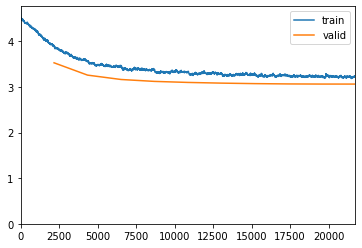

In [12]:
learn2.fit_one_cycle(10, 2e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.046422,2.952892,0.390964,12:47
1,2.981141,2.890246,0.400801,12:47
2,2.875721,2.822089,0.410528,12:47
3,2.744131,2.773097,0.418331,12:47
4,2.672687,2.761913,0.420095,12:47


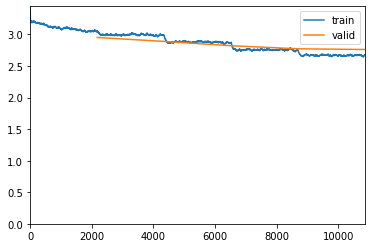

In [13]:
learn2.unfreeze()
learn2.fit_one_cycle(5, 2e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.655881,2.758635,0.420702,12:46


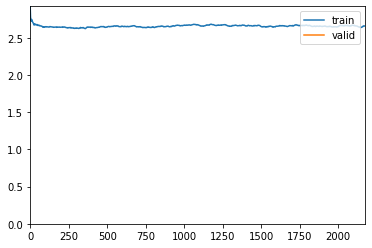

In [14]:
learn2.fit_one_cycle(1, 2e-4, moms=(0.8,0.7))

In [15]:
learn2.save(mdl_path/'3rdTVA_pretrained')

In [16]:
learn2.data.vocab.save(mdl_path/'3rdTVA_pretrained')

In [17]:
learn2.export(mdl_path/"3rdTVA_pretrained.pkl")

In [27]:
learn2.predict("L’heure était au nettoyage mercredi matin à Lac-aux-Sables, en Mauricie, après le passage d’une possible tornade qui a causé plusieurs dégâts dans le secteur, sans faire de blessés graves.", 200, temperature=0.3)

"L’heure était au nettoyage mercredi matin à Lac-aux-Sables, en Mauricie, après le passage d’une possible tornade qui a causé plusieurs dégâts dans le secteur, sans faire de blessés graves. Les autorités ont dû intervenir pour dégager les victimes . Les autorités ont dû fermer le boulevard Henri - Bourassa , mais la situation est maintenant revenue à la normale . Le temps chaud et sec des derniers jours a forcé les autorités à fermer la rue Sherbrooke . Les autorités ont procédé à une inspection des lieux pour tenter de déterminer les causes exactes de l' accident . xxbos Les Canadiens de Montréal ont remporté le match de la série de championnat de la Ligue nationale de hockey , dimanche , au Centre Bell . xxbos Le Parti libéral du Canada a obtenu le mandat de former le gouvernement minoritaire de Jean Chrétien . Le Parti conservateur a obtenu l' appui de l' Alliance canadienne , qui a obtenu 26 % des voix . Les libéraux ont remporté le scrutin , avec seulement 8 % des voix . Le Parti 